# Analysis of the Palmer Penguins Dataset.
*By Laura Lyons*
***

## Table of contents
***
1. [Introduction](#10-introduction)
1. [Method](#20-methods)
   - [Prerequisites/ Imports](#21-prerequisites-imports)
   - [Load the Data](#22-load-the-data)
1. [Results](#30-results)
   - [Data Overiew](#31-data-overiew)
   - [Data Clean-up](#31-data-clean-up)
   - [Data Analysis](#31-data-analysis)
1. [References](#references)

## **1.    Introduction**
***
The Palmer Penguin’s data set is a collaboration of 3 sets of field results, collected by [K.B. Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php), at the Palmer Station in Antarctica, between 2007- 2009 and published in 2020. Three penguin species of the genus *Pygoscelis* were studied to analyis potential sexual and ecologial dimorphisim due to differing habitat preference (Figure 1.1). Since then, the data was released for public use as a teaching tool for data exploration and visualisation (Gorman *et. al* 2020). 

The raw data set is available [on GitHub](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/346px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg" alt="*P.adelidae*" width="200" height="300"/> |<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/800px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg" alt="*P.antarctica*" width="200" height="300"/>|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/1024px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg" alt="*P.papua*" width="300" height="450" />|
|:---------:|:---------:|:---------:|
| *P. adelidae*| *P. antarctica*| *P. papua*|

Figure 1.1 Three species *Pygoscelis* penguins studied during the Palmer Penguins Dataset.

*Reference: Pictures by Andrew Shiva / Wikipedia, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=46674168*

## **2.    Methods**
***

#### 2.1    Prerequisites/ Imports

A number of imports were used to help with the data analysis and visualisation.

1. **Pandas**: for for the DataFrame data structure and forstoring, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.

1. **Numpy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.

1. **Matplotlib.pyplot:** for creating plots

1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation

1. **sklearn.impute**: is used to help with inputting missing values into a data set.

In [5]:
# Data frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 2.2    Load the Data
The palmer penguins data set was loaded from a [URL](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). This URL was choosen as it the headers for the variables are predefinied, with the unit of measurement included.

In [7]:
# Load the penguins data set.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

Once the data was loaded, it allowed analyse/ investigate the data to begin

## **3. Results**
***

#### 3.1    Data

In [8]:
# An overview of the data was retrieved so that we could decifer the type and number of variables present. 
df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
# It would be useful to know how many of each species were analised and also how many male and female penguins were measured within each species.

df ['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
# This will help detail the names of the islands were the penguins were measured and also how many were measures at each island.

df ['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [11]:
# Lets look at the last col. Sex ie the number of penguins of each sex.
df ['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

From the above table, we can see that there were 344 penguins were analyised for 7 different variables.
1. Species (152 *Adelie*, 124 *Gentoo* and 68 *Chinstrap*).
1. Island (168 penguins were measured on Brisceo Island, 124 on Dream Island and 52 on Torgersen Island)
1. Bill Length (mm)
1. Bill depth (mm)
1. Flipper length (mm) 
1. Body mass (g)
1. Sex (168 ,male penguins and 165 female penguins)

#### 3.1    Data Clean-up

From the initial overview of the dataframe, we can see that our data contains a number of missing values, coded as 'NaN'. It would be helpful to know how many missing values the data set contains.

In [12]:
# Before we delve into our data analysis, it would be good practice to check for the presence of missing values.

df.isnull().sum() 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

From the above table, we can see that there are 19 missing values, present in 5 of the 7 variables. Best practice would be to identify (as above) and treat both potential null and duplicate values. 

Lets have a look at which rows contain the null values (Dash, 2022).

In [13]:
# Which rows contain the null values, 'NaN'. (NaN= Not a Number)

df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


After identifying the location of the missing values we need to decide how to treat these variables. There are 2 options:

1. We can decide to delete the rows/ columns with the missing data, if this will not have an impact on the data set; or
2. We can replace the missing values using the mean, median or mode of the variable in question [(Yakubu, 2023,](https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d) [Bankar, 2023)](https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a)

Handling missing data is important, as some machine learning algorithms do not support data with missing values (Bankar, 2023). The most commen method used to deal with missing values is imputation, which can be defined as:\
"*A process to assign or substitute the missing row/ column value with the dedired/calculated value*" (Chauhan, 2023)

Imputation techniques include:
1. Statistic: where a statistical value is calculated for each column (*i.e.* the mean), and this is then used to replace the missing values within that column.
1. Mean: where an educated guess is used to produced a number to replace the missing values within each column.
1. Mode: This is where the mean values of the entir column in question is used to replace the missing values.
1. Uni-variate: The missing data is replaced by the mean/median/random value (Bankar, 2023).

For this analysis, we are going to replace the missing values using the first method mentioned above, replacing the missing values with the mean of that column.

In [20]:
# To get the mean value of bill length, we first need to remove the missing data, we can start will bill length.

mean_value = df ['bill_length_mm'].mean()
df ['bill_length_mm'] = df['bill_length_mm'].fillna(mean_value)

mean_value = df ['bill_depth_mm'].mean()
df ['bill_depth_mm'] = df['bill_depth_mm'].fillna(mean_value)

mean_value = df ['flipper_length_mm'].mean()
df ['flipper_length_mm'] = df['flipper_length_mm'].fillna(mean_value)

mean_value = df ['body_mass_g'].mean()
df ['body_mass_g'] = df['body_mass_g'].fillna(mean_value)

# Check that the missing values have been replaced
df .isnull().sum()


species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

For now, it would be best to remove columns whereby the sex of the penguin is undefined, as i hope to look at the morphometric variation of the penguins not only between species but also intra species, by sex.

In [23]:
# Remove rows where the 'sex' column has NaN values
dfcleaned = df.dropna(subset=['sex'])

# Save the cleaned dataset to a new CSV file
dfcleaned.to_csv('cleaned_dataset.csv', index=False)

# Check to see the data set is clean.
dfcleaned.isnull().sum() 


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

We now have a clean data set, with no missing values, ready for data analysis.

#### 3.1    Data Analysis

Lets start by getting an overview of the data set, by species

In [30]:
# Describe the data set.
# Specify the columns for which you want descriptive statistics
variables_of_interest = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Group the data by 'species' and 'sex', then describe each group.
grouped_description = dfcleaned.groupby(['species', 'sex'])['bill_length_mm'].describe()

# Print the descriptive statistics for each group
print(grouped_description)


                  count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
          MALE     61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6  


In [26]:
# Filter the data by the species.
adelie_df = dfcleaned[dfcleaned["species"] == "adelie"]
gentoo_df=df[df["species"] == "gentoo"]
chinstrap_df=df[df["species"] == "chinstrap"]

summary_adelie = adelie_df.describe()
summary_gentoo = gentoo_df.describe().map(lambda x: f"{x:0.2f}")
summary_chinstrap = chinstrap_df.describe().map(lambda x: f"{x:0.2f}")

In [27]:

print('This is a summary for the Adelie penguins')
adelie_df.describe()


This is a summary for the Adelie penguins


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [ ]:
print('This is a summary for the Gentoo penguins')
summary_gentoo 


c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

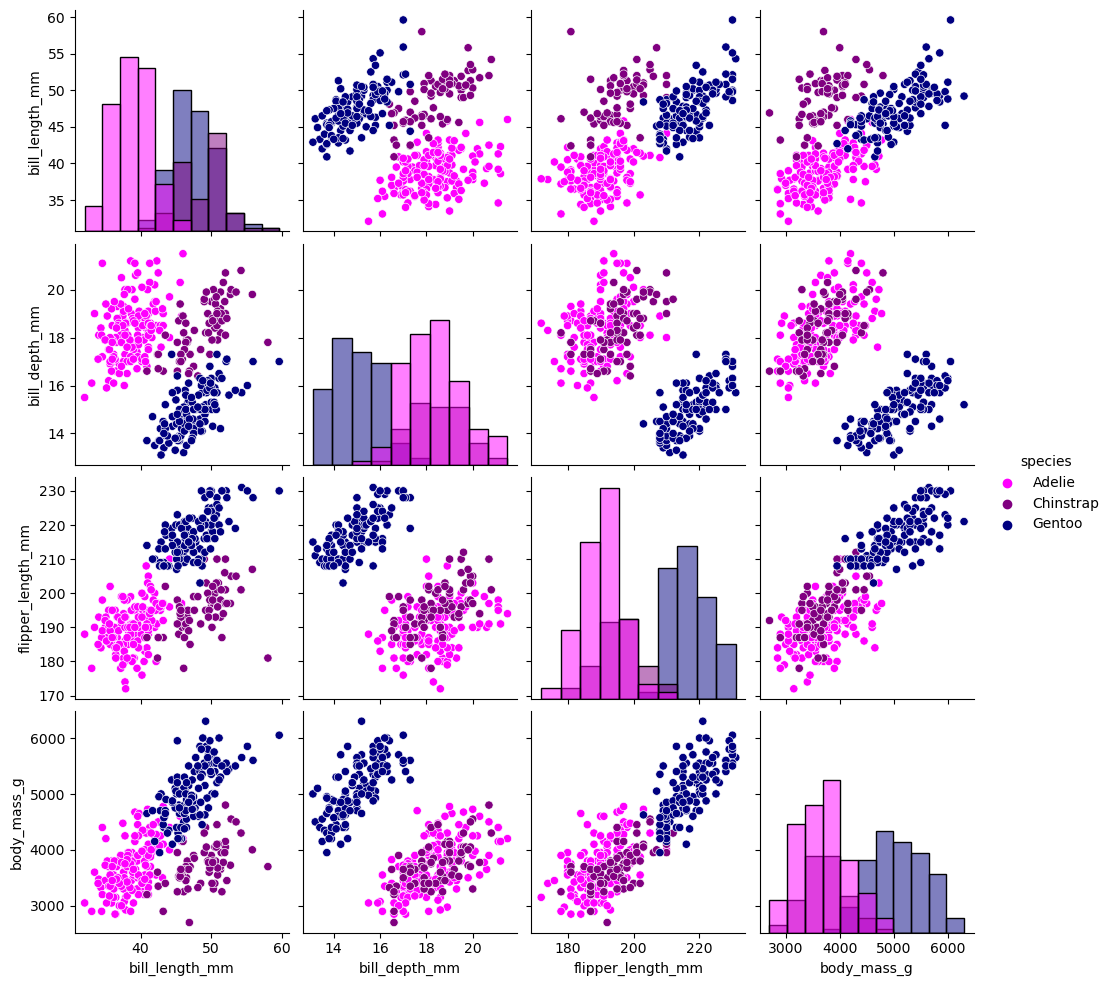

In [ ]:
# Seanbord: Pairplot can be used to create a figure containing a histogram for all 
# Reference: <https://seaborn.pydata.org/generated/seaborn.PairGrid.html>

sns.pairplot(df, hue = "species", diag_kind = "hist", palette = ["magenta","purple","navy"])
plt.show()

### References

Bankar R (2023) Supervised Learning with Scikit-learn. URL: https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a. aCCESSED: 21/04/2024.

Chauhan A (2023) In-depth Handling/Imputation Techniques of Missing Values in Feature Transformation. URL: https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation. Accessed: 21/04/2024.

Dash SK (2022) Data Exploration and Visualisation Using Palmer Penguins Dataset. URL: https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/ Accessed: 21/04/2024.

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

Yakuba A (2023) Python Data Analysis Project — Palmer Penguins Dataset. URL: Python Data Analysis Project — Palmer Penguins Dataset. aCCESSED 24/04/2024


***
### End